# Issues (task) covered in this feature notebook :

*  explore data a bit w/modules, functions and plots
*  baseline model test
    - Logistic regression or Dummy Classifier
    - or Clustering algorithm
    - or treebased
* base metrics 
    - precision_recall
    - f1_score
    - classification report
    - confusion matrix
    - area under the curve

* train_test_split


[Project Issue Link](https://github.com/users/Cazta/projects/1/views/2?pane=issue&itemId=32899160)



# Importing Packages

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score


import warnings
warnings.filterwarnings('ignore')

# Global Variables

In [2]:
# global variables

# for reproducibility sake
RSEED = 42

# data path to load version 1 of the processed fraud data
data_path = 'data/fraud_data_processed_V1.csv'




# Loading Data

In [3]:
# load, get information on dataset and display descriptive summary



def get_data_summary(data_path = None, data= None, desc_sm = False, no_unq = False, *args, **kwargs): 

    if (data is None) and (data_path is None):
        raise ValueError('''Either enther a data path or a dataset (dataframe)
                    
                        'data' : a dataset (dataframe)
                        'datapath' : a data path used to load a csv data file
                    
                        ''') 

    elif (data is None) and (data_path is not None):
        data = pd.read_csv( data_path) 
    else:
        data = data


    print (f"Dataset shape: {data.shape}") 

    print('_____'*10)

    print(f''' 
    Number of observations : {data.shape[0]}
    Number of features : {data.shape[1]}
        ''')

    print('_____'*10)

    print ("Dataset sample: ") 
    print('_____'*10)

    display(data.head())

    print('_____'*10)

    if desc_sm:
        print ("Dataset descriptive summary: ") 
        print('_____'*10)

        display(data.describe().T.style.format('{:.2f}'))

    print('_____'*10)

    if no_unq:
        print ("Unique values/classes for dataset features: ") 
        print('_____'*10)

        display(data.nunique())


    return data 

# load version 1 of the processed fraud data

df = get_data_summary(data_path = data_path, desc_sm = True, no_unq = True)



Dataset shape: (4476691, 21)
__________________________________________________
 
    Number of observations : 4476691
    Number of features : 21
        
__________________________________________________
Dataset sample: 
__________________________________________________


,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,1994-12-31,0,2014-03-24,11,1335667,0.0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,1994-12-31,0,2013-03-29,11,1335667,0.0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,1994-12-31,0,2015-03-23,11,1335667,0.0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,1994-12-31,0,2015-07-13,11,1335667,0.0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,1994-12-31,0,2016-11-17,11,1335667,0.0,...,9,1,572,0,0,0,15066,15638,12,ELEC


__________________________________________________
Dataset descriptive summary: 
__________________________________________________


,count,mean,std,min,25%,50%,75%,max
disrict,4476691.00,63.48,3.27,60.00,62.00,62.00,63.00,69.00
client_catg,4476691.00,11.94,6.02,11.00,11.00,11.00,11.00,51.00
region,4476691.00,210.36,103.58,101.00,103.00,301.00,309.00,399.00
target,4476691.00,0.08,0.27,0.00,0.00,0.00,0.00,1.00
tarif_type,4476691.00,20.13,13.47,8.00,11.00,11.00,40.00,45.00
counter_number,4476691.00,123060293382.90,1657277950813.88,0.00,121110.00,494561.00,1115161.00,27981145458733.00
counter_statue,4476691.00,0.04,0.37,0.00,0.00,0.00,0.00,5.00
counter_code,4476691.00,172.49,133.89,5.00,5.00,203.00,207.00,600.00
reading_remarque,4476691.00,7.32,1.36,6.00,6.00,8.00,9.00,9.00
counter_coefficient,4476691.00,1.00,0.31,0.00,1.00,1.00,1.00,50.00


__________________________________________________
Unique values/classes for dataset features: 
__________________________________________________


disrict                      4
client_id               135491
client_catg                  3
region                      25
creation_date             8088
target                       2
invoice_date              8275
tarif_type                  17
counter_number          201892
counter_statue               6
counter_code                40
reading_remarque             4
counter_coefficient         13
consommation_level_1      8295
consommation_level_2     12576
consommation_level_3      2253
consommation_level_4     12075
old_index               155648
new_index               157980
months_number             1351
counter_type                 2
dtype: int64

---

# Brief Exploration

* Stakeholder : ZINDI, STEG (Tunisian Company of Electricity and Gas)
* Business objective : To use client's billing history for detecting which clients are fraudulently manipulating their energy (electricity and gas) meters
* open questions : 
    - What does the consumption  (consumation?) levels tell us about fraudelent activities? 
    - What does the recorded reading remark  tell us about fraudelent activities? 
    - etc

* hypothesis statemnets :


* aggregating some data to gain insight
* basic plots to investigate the data visually
    - countplots
    - 

    

In [4]:
# grouping by client id's using the aggregate : count

df_clients = df.groupby('client_id').count().reset_index()

# curious grouped dataframe summary : by client's id count

df_clients_sm = get_data_summary(data = df_clients)




Dataset shape: (135491, 21)
__________________________________________________
 
    Number of observations : 135491
    Number of features : 21
        
__________________________________________________
Dataset sample: 
__________________________________________________


,client_id,disrict,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
1,train_Client_1,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
2,train_Client_10,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
3,train_Client_100,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
4,train_Client_1000,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


__________________________________________________
__________________________________________________


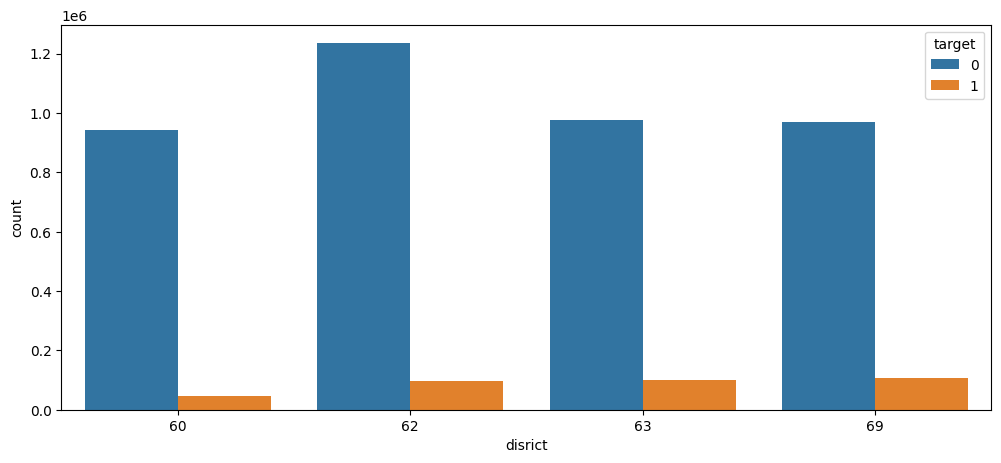

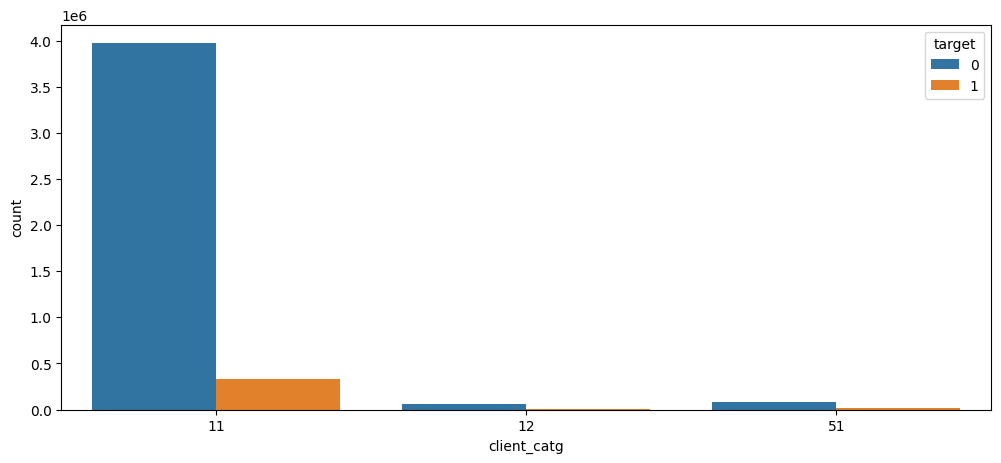

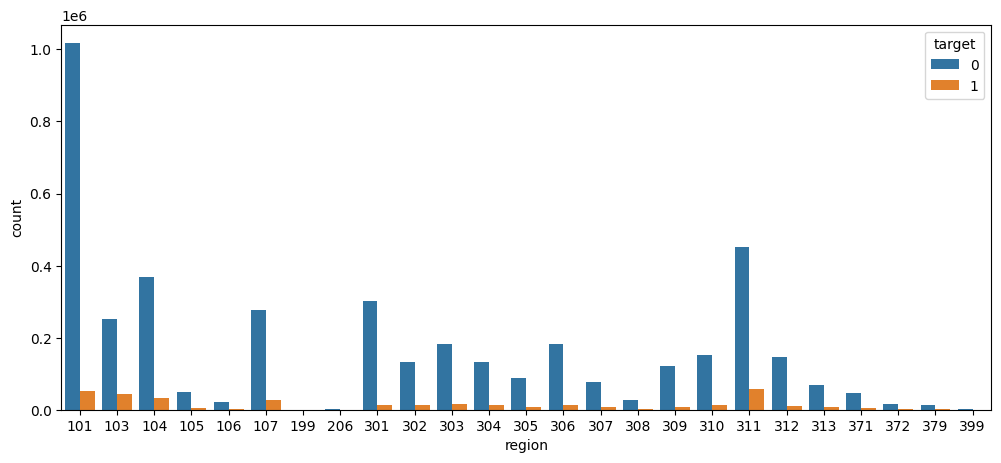

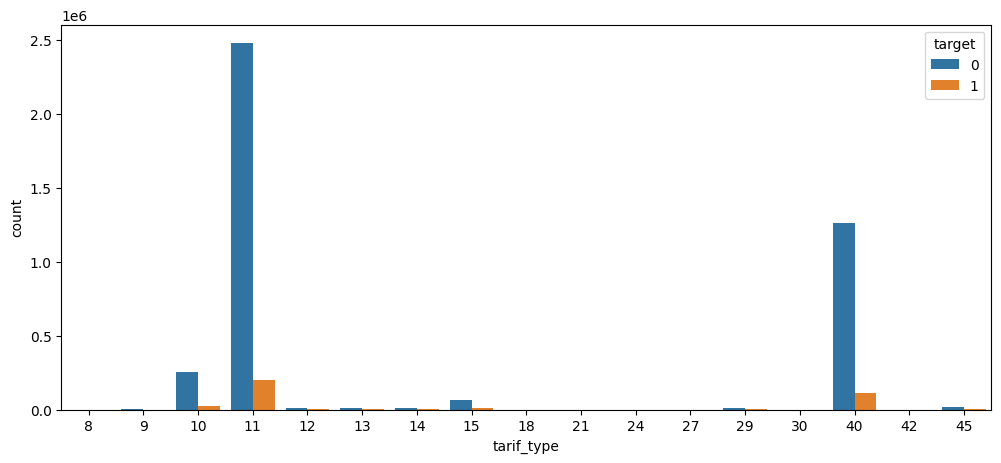

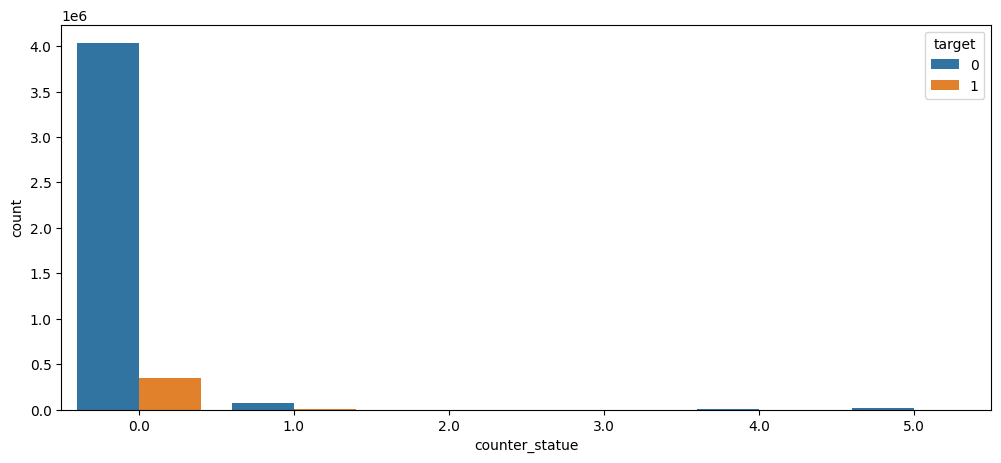

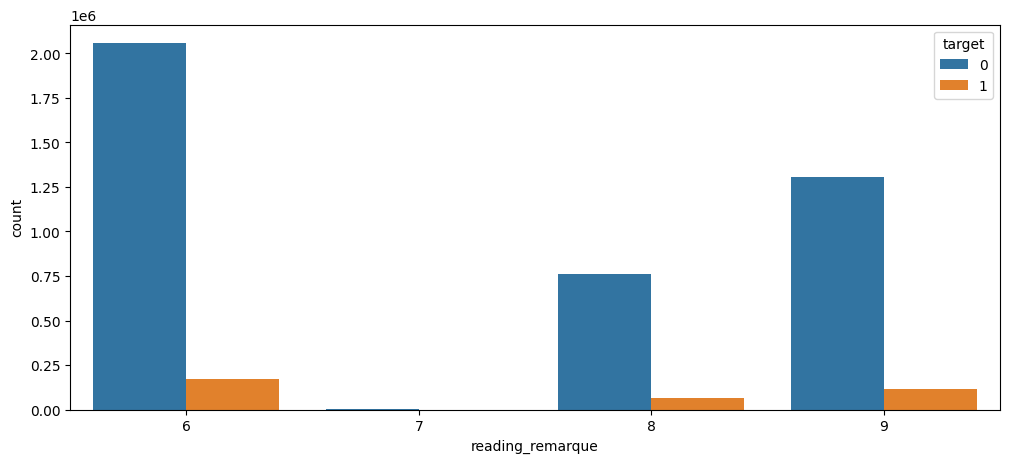

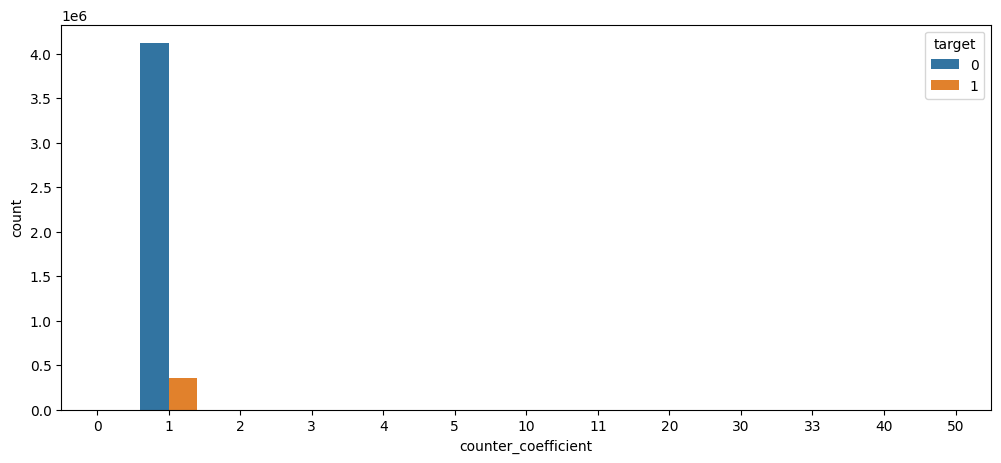

In [5]:

# countplots of specific features by target

cat_features = ['disrict', 'client_catg', 'region',  'tarif_type', 
                    'counter_statue', 'reading_remarque', 'counter_coefficient']

for i in cat_features:
    fig = plt.figure(figsize=(12,5))
    sns.countplot(data=df, x=df[i], hue=df["target"])
    plt.show();

In [6]:
# grouby reading remark for dataset with specific features

feat_1 =  ['target', 'counter_number', 'counter_statue', 'counter_code', 
        'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
        'consommation_level_3', 'consommation_level_4', 'old_index',
        'new_index']


read_mark = df.groupby("reading_remarque")[feat_1].count().reset_index()
read_mark

,reading_remarque,target,counter_number,counter_statue,counter_code,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index
0,6,2230915,2230915,2230915,2230915,2230915,2230915,2230915,2230915,2230915,2230915,2230915
1,7,661,661,661,661,661,661,661,661,661,661,661
2,8,828123,828123,828123,828123,828123,828123,828123,828123,828123,828123,828123
3,9,1416992,1416992,1416992,1416992,1416992,1416992,1416992,1416992,1416992,1416992,1416992


In [7]:
feat_2 =  ['reading_remarque', 'counter_number', 'counter_statue', 'counter_code', 
        'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
        'consommation_level_3', 'consommation_level_4', 'old_index',
        'new_index']


target_count = df.groupby("target")[feat_2].count().reset_index()
target_count

,target,reading_remarque,counter_number,counter_statue,counter_code,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index
0,0,4123582,4123582,4123582,4123582,4123582,4123582,4123582,4123582,4123582,4123582,4123582
1,1,353109,353109,353109,353109,353109,353109,353109,353109,353109,353109,353109


In [8]:
# consumation levels, counter details and target

cons_count =  ['target', 'counter_number',
        'counter_statue', 'counter_code', 'reading_remarque',
        'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
        'consommation_level_3', 'consommation_level_4', 'old_index',
        'new_index']

# date related feature variables

date_features = ['target', 'creation_date',  'invoice_date',  'months_number']


# Baseline Modelling

* state baseline features
* define x (input data) and y (target)
* train_test_split 
* run baseline model : logistic reg?  sgd? knn? 


# Evaluate the baseline model

* get evaluation scores using features from the initial data
    - Area under the curve score (roc_auc_score)
    - precision score
    - recall score
    - accuracy score
    - balanced accuracy score
    - confusion matrix
    - classification report


In [9]:
# feature variables for version 1 (df) of processed fraud data for baseline model 

base_features = ['disrict', 'client_catg', 'region',  
                'tarif_type', 'counter_number','counter_statue', 
                'counter_code', 'reading_remarque','counter_coefficient', 
                'consommation_level_1', 'consommation_level_2', 'consommation_level_3', 
                'consommation_level_4', 'old_index', 'new_index']


In [10]:
# defining the base x (input data) features and y (target) feature

x_base = df[base_features]
y = df["target"]


print(f"shape of baseline input data: {x_base.shape}")
print(f"shape of target data: {y.shape}")



shape of baseline input data: (4476691, 15)
shape of target data: (4476691,)


In [11]:
# train test split for base


x_train, x_test, y_train, y_test = train_test_split(x_base, y, test_size=0.25, random_state=RSEED)




In [12]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred_lr = log_reg.predict(x_test)

In [13]:
# evaluation metrics : confusion matrix,, accuracy, balance accuracy, classification report

def eval_metrics(y_test, y_pred): 
    """
    Summary:
        Function to calculate the accuracy and balanced accuracy score for imbalanced data, get the confusion 
        matrix as well as the classification report of the ML 
        model based on the predictions and true target values for the test set.

    Args:
        y_test (numpy.ndarray): test target data
        y_pred (numpy.ndarray): predictions based on test data
    """    
    
    print("-----"*15)
    print(f'''Confusion Matrix: 
    {confusion_matrix(y_test, y_pred)} ''') 
    
    print("-----"*15)
    print (f''' Accuracy : 
    {(accuracy_score(y_test, y_pred).round(2)) * 100} ''')

    print("-----"*15)
    print (f''' Balanced Accuracy : 
    {(balanced_accuracy_score(y_test, y_pred).round(2)) * 100} ''')
    
    print("-----"*15)
    print(f'''Report :  
    {classification_report(y_test, y_pred)} ''') 



eval_metrics(y_test, y_pred_lr)

---------------------------------------------------------------------------
Confusion Matrix: 
    [[1030684       0]
 [  88489       0]] 
---------------------------------------------------------------------------
 Accuracy : 
    92.0 
---------------------------------------------------------------------------
 Balanced Accuracy : 
    50.0 
---------------------------------------------------------------------------
Report :  
                  precision    recall  f1-score   support

           0       0.92      1.00      0.96   1030684
           1       0.00      0.00      0.00     88489

    accuracy                           0.92   1119173
   macro avg       0.46      0.50      0.48   1119173
weighted avg       0.85      0.92      0.88   1119173
 


In [14]:
# eval scoring metrics : recall, precisoon, f1_score, roc_auc_score, fpr, tpr


def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['f1_score'] = f1_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['f1_score'] = f1_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    # train_results = {}
    # train_results['recall'] = recall_score(y_test, train_predictions)
    # train_results['precision'] = precision_score(y_test, train_predictions)
    # train_results['f1_score'] = f1_score(y_test, predictions)
    # train_results['roc'] = roc_auc_score(y_test, train_probs)
    
    for metric in ['recall', 'precision', 'f1_score', 'roc']:
        #print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} ')

    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [15]:
# logistic regression model 

train_probs_lr = log_reg.predict_proba(x_train)[:, 1]
test_probs_lr = log_reg.predict_proba(x_test)[:, 1]

train_preds_lr = log_reg.predict(x_train)
test_preds_lr = log_reg.predict(x_test)

print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs_lr)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, test_probs_lr)}')
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

Train ROC AUC Score: 0.5041442259970864
Test ROC AUC  Score: 0.5031241808437507
Baseline ROC AUC: 0.5


Recall Baseline: 1.0 Test: 0.0 
Precision Baseline: 0.08 Test: 0.0 
F1_score Baseline: 0.15 Test: 0.0 
Roc Baseline: 0.5 Test: 0.5 


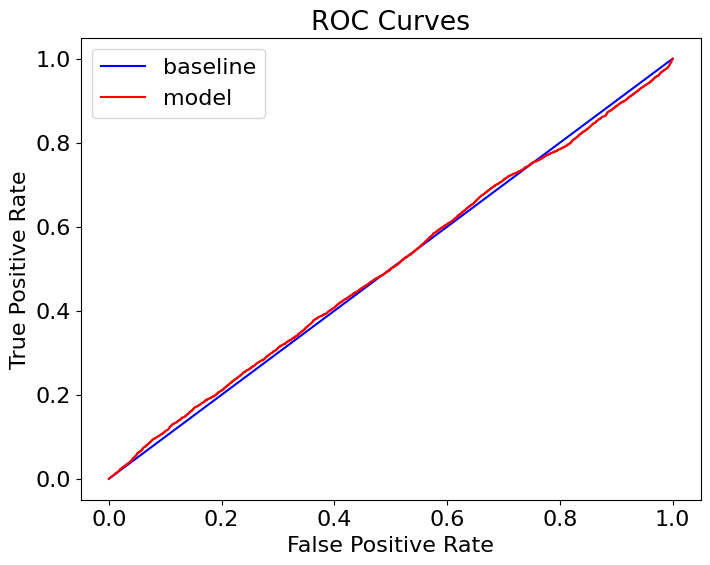

In [16]:


# --!
evaluate_model(test_preds_lr, test_probs_lr, train_preds_lr, train_probs_lr)



In [17]:
# K-neighbours classifier as baseline?


# initialize and fit/train model on data

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, np.ravel(y_train))

# predict on test

y_pred_knn = knn.predict(x_test)





In [18]:
# Make probability predictions
train_probs_knn = knn.predict_proba(x_train)[:, 1]
test_probs_knn = knn.predict_proba(x_test)[:, 1]

train_preds_knn = knn.predict(x_train)
test_preds_knn = knn.predict(x_test)

print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs_knn)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, test_probs_knn)}')
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')


Train ROC AUC Score: 0.9332493833468254
Test ROC AUC  Score: 0.692194638331282
Baseline ROC AUC: 0.5


In [19]:
eval_metrics(y_test, y_pred_knn)



---------------------------------------------------------------------------
Confusion Matrix: 
    [[1018162   12522]
 [  72106   16383]] 
---------------------------------------------------------------------------
 Accuracy : 
    92.0 
---------------------------------------------------------------------------
 Balanced Accuracy : 
    59.0 
---------------------------------------------------------------------------
Report :  
                  precision    recall  f1-score   support

           0       0.93      0.99      0.96   1030684
           1       0.57      0.19      0.28     88489

    accuracy                           0.92   1119173
   macro avg       0.75      0.59      0.62   1119173
weighted avg       0.90      0.92      0.91   1119173
 


Recall Baseline: 1.0 Test: 0.19 
Precision Baseline: 0.08 Test: 0.57 
F1_score Baseline: 0.15 Test: 0.28 
Roc Baseline: 0.5 Test: 0.69 


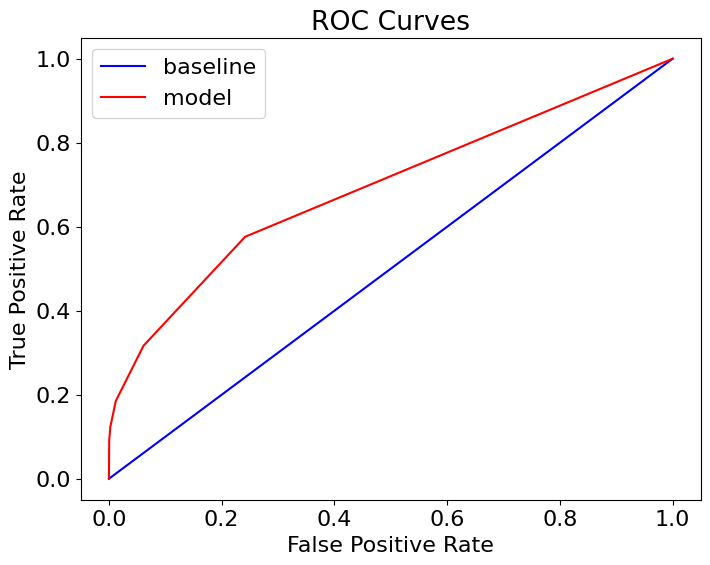

In [20]:

evaluate_model(test_preds_knn, test_probs_knn, train_preds_knn, train_probs_knn)


In [21]:
# sgdclassifier as baseline?

# Fit and evaluate model without hyperparameter tuning using cross validation and unscaled data 
sgd_classifier = SGDClassifier(random_state=RSEED)
scores = cross_val_score(sgd_classifier, x_train, y_train, cv=5, n_jobs=-1)

# Evaluation 
print('Score (unscaled):', round(scores.mean(), 4))


Score (unscaled): 0.7557


In [22]:
# save current version of processed data for use later

# df_processed.to_csv('data/fraud_data_processed_V1.csv', index=False)

